# Use PCA (Principle Component Analysis) for dimensional reduction

# Imports

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as datasets

# Create variables

In [59]:
# 1. Indlæs CSV-fil
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)


# 2. Undersøg data
print("Raw data:")

print(df.head())  # Se de første rækker
print(df.info())  # Se datatype og manglende værdier

X = df.values  # Konverter DataFrame til NumPy array


Raw data:
   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 

# Show the reduces dimension

In [68]:
scaler = MinMaxScaler()
print(scaler.fit(X))

X = scaler.transform(X)

MinMaxScaler()


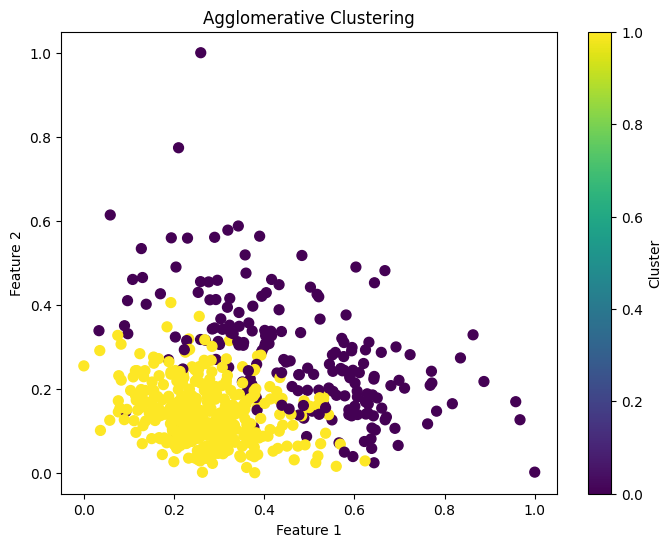

In [69]:
ACluster = AgglomerativeClustering(n_clusters=2)  # Definér KMeans med 3 clusters
y_acluster = ACluster.fit_predict(X)  # Fit modellen til data

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,-1], c=y_acluster, cmap='viridis', marker='o', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [71]:
# Assuming `data.target` contains the true labels
true_labels = data.target

# Calculate accuracy
accuracy = accuracy_score(true_labels, y_acluster)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, y_acluster)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8681898066783831
Confusion Matrix:
[[164  48]
 [ 27 330]]


# Kmeans Cluster

In [61]:
from sklearn.cluster import KMeans

# Elbow graph 
To find most uptimal n_cluster

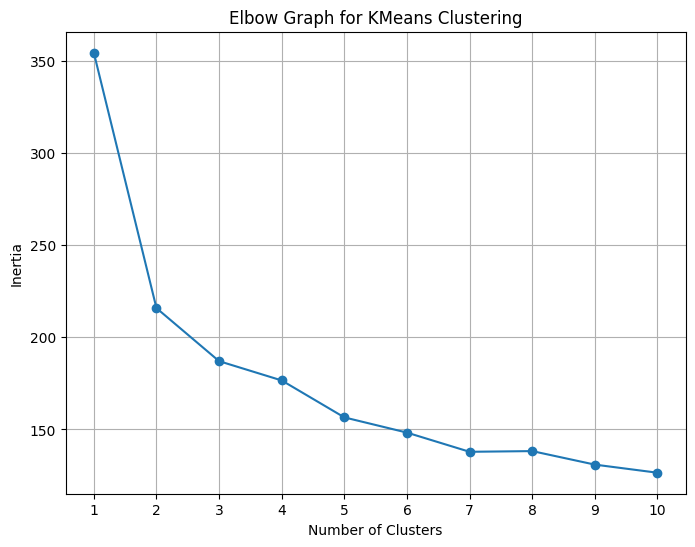

In [72]:
# List to store inertia values
inertia_values = []

# Test different numbers of clusters
for n_clusters in range(1, 11):  # From 1 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title("Elbow Graph for KMeans Clustering")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(range(1, 11))
plt.grid()
plt.show()

# Kmeans Cluster Show

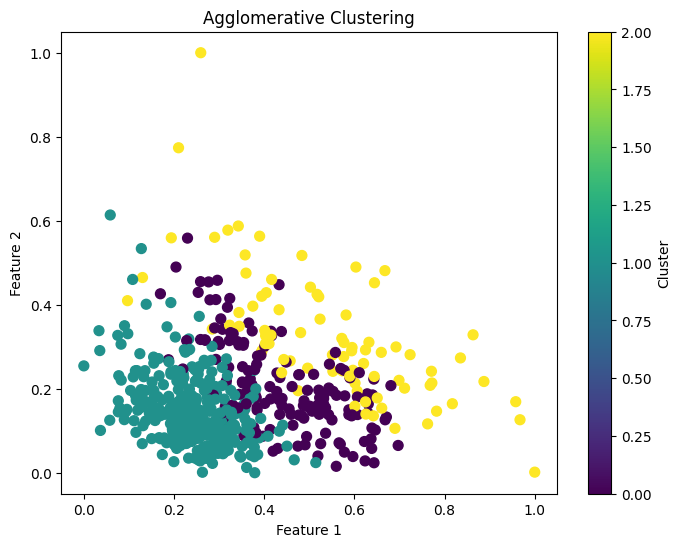

In [86]:
kmeans = KMeans(n_clusters=3)  # Definér KMeans med 3 clusters
y_kmeans = kmeans.fit_predict(X)  # Fit modellen til data

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,-1], c=y_kmeans, cmap='viridis', marker='o', s=50)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Cluster")
plt.show()

# Kmeans result

In [87]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, y_kmeans)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, y_kmeans)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7961335676625659
Confusion Matrix:
[[126   7  79]
 [ 27 327   3]
 [  0   0   0]]
